# Assignment 1

Suggested due date: 17th October 2018

## Linear regression

The aim of this assignment is to familiarise with the basics of a Tensorflow pipeline. We will use linear regression as a simple algorithm to work through building and executing a tensorflow graph purely as an exercise.

Given a number of independent variables <a href="https://www.codecogs.com/eqnedit.php?latex=x_i" target="_blank"><img src="https://latex.codecogs.com/gif.latex?x_i" title="x_i" /></a>, <a href="https://www.codecogs.com/eqnedit.php?latex=$i=1,\ldots,N$" target="_blank"><img src="https://latex.codecogs.com/gif.latex?$i=1,\ldots,N$" title="$i=1,\ldots,N$" /></a>, construct the matrix <a href="https://www.codecogs.com/eqnedit.php?latex=\mathbf{A}\in\mathbb{R}^{m\times(N&plus;1)}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\mathbf{A}\in\mathbb{R}^{m\times(N&plus;1)}" title="\mathbf{A}\in\mathbb{R}^{m\times(N+1)}" /></a>, where the data on the independent variables is stored in rows of <a href="https://www.codecogs.com/eqnedit.php?latex=$\mathbf{A}$" target="_blank"><img src="https://latex.codecogs.com/gif.latex?$\mathbf{A}$" title="$\mathbf{A}$" /></a>, and the last column is filled with ones (to account for the bias term). Also let <a href="https://www.codecogs.com/eqnedit.php?latex=\mathbf{b}\in\mathbb{R}^m" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\mathbf{b}\in\mathbb{R}^m" title="\mathbf{b}\in\mathbb{R}^m" /></a> be the target values from the dataset.

Then the linear regression problem can be expressed as

<a href="https://www.codecogs.com/eqnedit.php?latex=\mathbf{x}&space;=&space;\text{argmin}&space;\left|\left|\mathbf{Ax}&space;-&space;\mathbf{b}\right|\right|_2^2" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\mathbf{x}&space;=&space;\text{argmin}&space;\left|\left|\mathbf{Ax}&space;-&space;\mathbf{b}\right|\right|_2^2" title="\mathbf{x} = \text{argmin} \left|\left|\mathbf{Ax} - \mathbf{b}\right|\right|_2^2" /></a>

where <a href="https://www.codecogs.com/eqnedit.php?latex=\mathbf{x}\in\mathbb{R}^{N&plus;1}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\mathbf{x}\in\mathbb{R}^{N&plus;1}" title="\mathbf{x}\in\mathbb{R}^{N+1}" /></a> contains the <a href="https://www.codecogs.com/eqnedit.php?latex=$N$" target="_blank"><img src="https://latex.codecogs.com/gif.latex?$N$" title="$N$" /></a> coefficients for each independent variable, followed by the bias term.

Provided the columns of <a href="https://www.codecogs.com/eqnedit.php?latex=$\mathbf{A}$" target="_blank"><img src="https://latex.codecogs.com/gif.latex?$\mathbf{A}$" title="$\mathbf{A}$" /></a> are linearly independent, the solution can be expressed in closed form as the normal equation:

<a href="https://www.codecogs.com/eqnedit.php?latex=\mathbf{x}&space;=&space;(\mathbf{A}^T&space;\mathbf{A})^{-1}\mathbf{A}^T\mathbf{b}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\mathbf{x}&space;=&space;(\mathbf{A}^T&space;\mathbf{A})^{-1}\mathbf{A}^T\mathbf{b}" title="\mathbf{x} = (\mathbf{A}^T \mathbf{A})^{-1}\mathbf{A}^T\mathbf{b}" /></a>.

## Implementation in Tensorflow

The assignment is to implement the normal equation as a graph in Tensorflow. Your solution should be written in a python script. 

The matrix of independent variables and the vector of targets should be defined as placeholders, allowing for a variable number of data points and features. The graph should define the solution to the linear regression problem using the normal equation.

In this folder you will find the file 'poverty.txt', which contains data on poverty level and teen birth rate in the US. This dataset has 51 datapoints for the 50 states and the District of Columbia in the United States. 

Use your Tensorflow implementation to regress Brth15to17 against PovPct from the attached file. Report the equation expressing the solution. Plot the data and the solution and include as an image file.

Use the **same Tensorflow graph** to regress Brth15to17 against PovPct and ViolCrime and report the equation expressing the solution.


In [1]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Load dataset
PovPct, Brth15to17, ViolCrime = np.loadtxt("poverty.txt", usecols=(1,2,4), skiprows=1, unpack=True)
PovPct = torch.tensor(PovPct)
Brth15to17 = torch.tensor(Brth15to17)
ViolCrime = torch.tensor(ViolCrime)

PovPct.size()

torch.Size([51])

In [16]:
# Construct A, B; as data for task 1 / 2
A = torch.cat([PovPct.view(-1, 1), torch.ones(PovPct.size(0), 1, dtype=torch.float64)], dim=1)
B = torch.cat([PovPct.view(-1, 1), ViolCrime.view(-1, 1), torch.ones(PovPct.size(0), 1, dtype=torch.float64)], dim=1)

A.size(), B.size()

(torch.Size([51, 2]), torch.Size([51, 3]))

In [18]:
# Learn a linear model
c_a = A.t().matmul(A).inverse().matmul(A.t()).matmul(Brth15to17)
c_b = B.t().matmul(B).inverse().matmul(B.t()).matmul(Brth15to17)

c_a, c_b

(tensor([1.3733, 4.2673], dtype=torch.float64),
 tensor([1.0365, 0.3442, 5.9822], dtype=torch.float64))

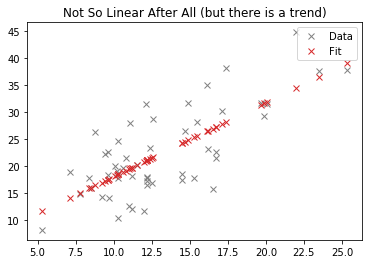

In [42]:
# Plot graphs
_, ax = plt.subplots()


ax.plot(np.array(PovPct), np.array(Brth15to17), "x", color="grey", label="Data")
ax.plot(np.array(PovPct), np.array(A.matmul(c_a)), "x", color="tab:red", label="Fit")

ax.set_title("Not So Linear After All (but there is a trend)")
ax.legend()

plt.show()

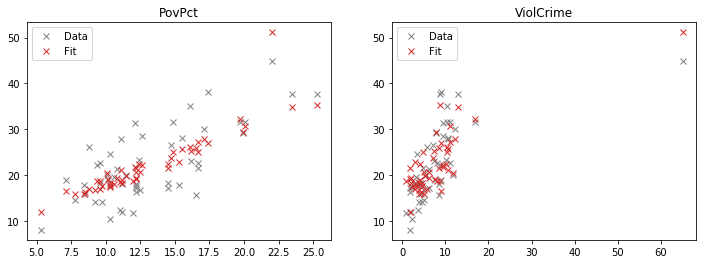

In [51]:
_, ax = plt.subplots(1, 2, figsize=(12, 4))


ax[0].plot(np.array(PovPct), np.array(Brth15to17), "x", color="grey", label="Data")
ax[0].plot(np.array(PovPct), np.array(B.matmul(c_b)), "x", color="tab:red", label="Fit")

ax[1].plot(np.array(ViolCrime), np.array(Brth15to17), "x", color="grey", label="Data")
ax[1].plot(np.array(ViolCrime), np.array(B.matmul(c_b)), "x", color="tab:red", label="Fit")

ax[0].set_title("PovPct")
ax[1].set_title("ViolCrime")

for a in ax:
    a.legend()

plt.show()